In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read from csv

admission_df = pd.read_csv("Admission_Predict.csv")

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# we don't need Serial No.
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
# perform EDA

# checking the null values

admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# check the dataframe information

admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# statistical summary of the dataframe

admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# grouping by university ranking

df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

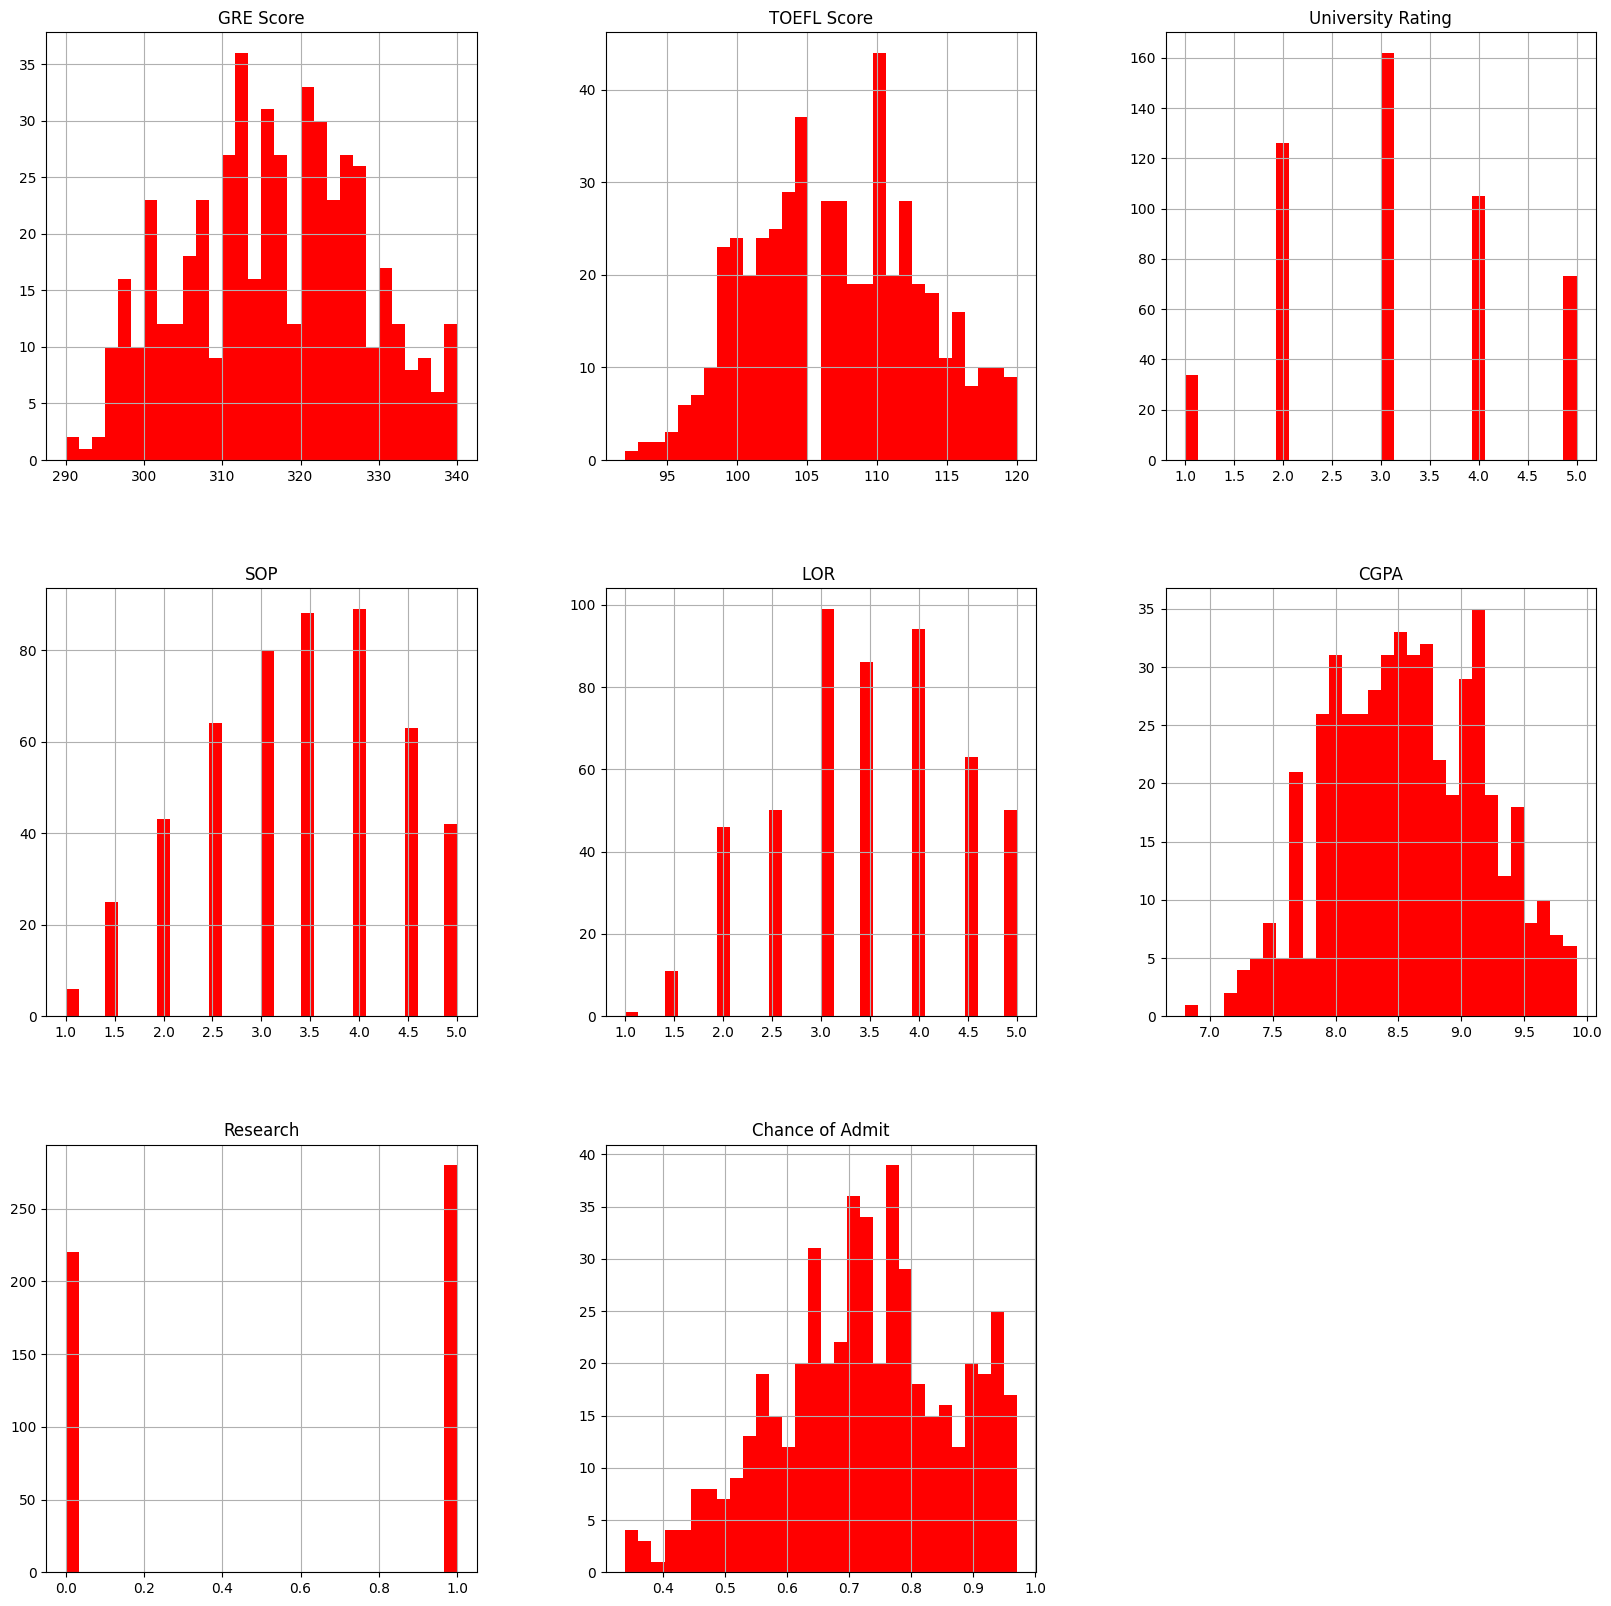

In [9]:
# perform data visualizations

admission_df.hist(bins=30, figsize=(20, 20),color='red')

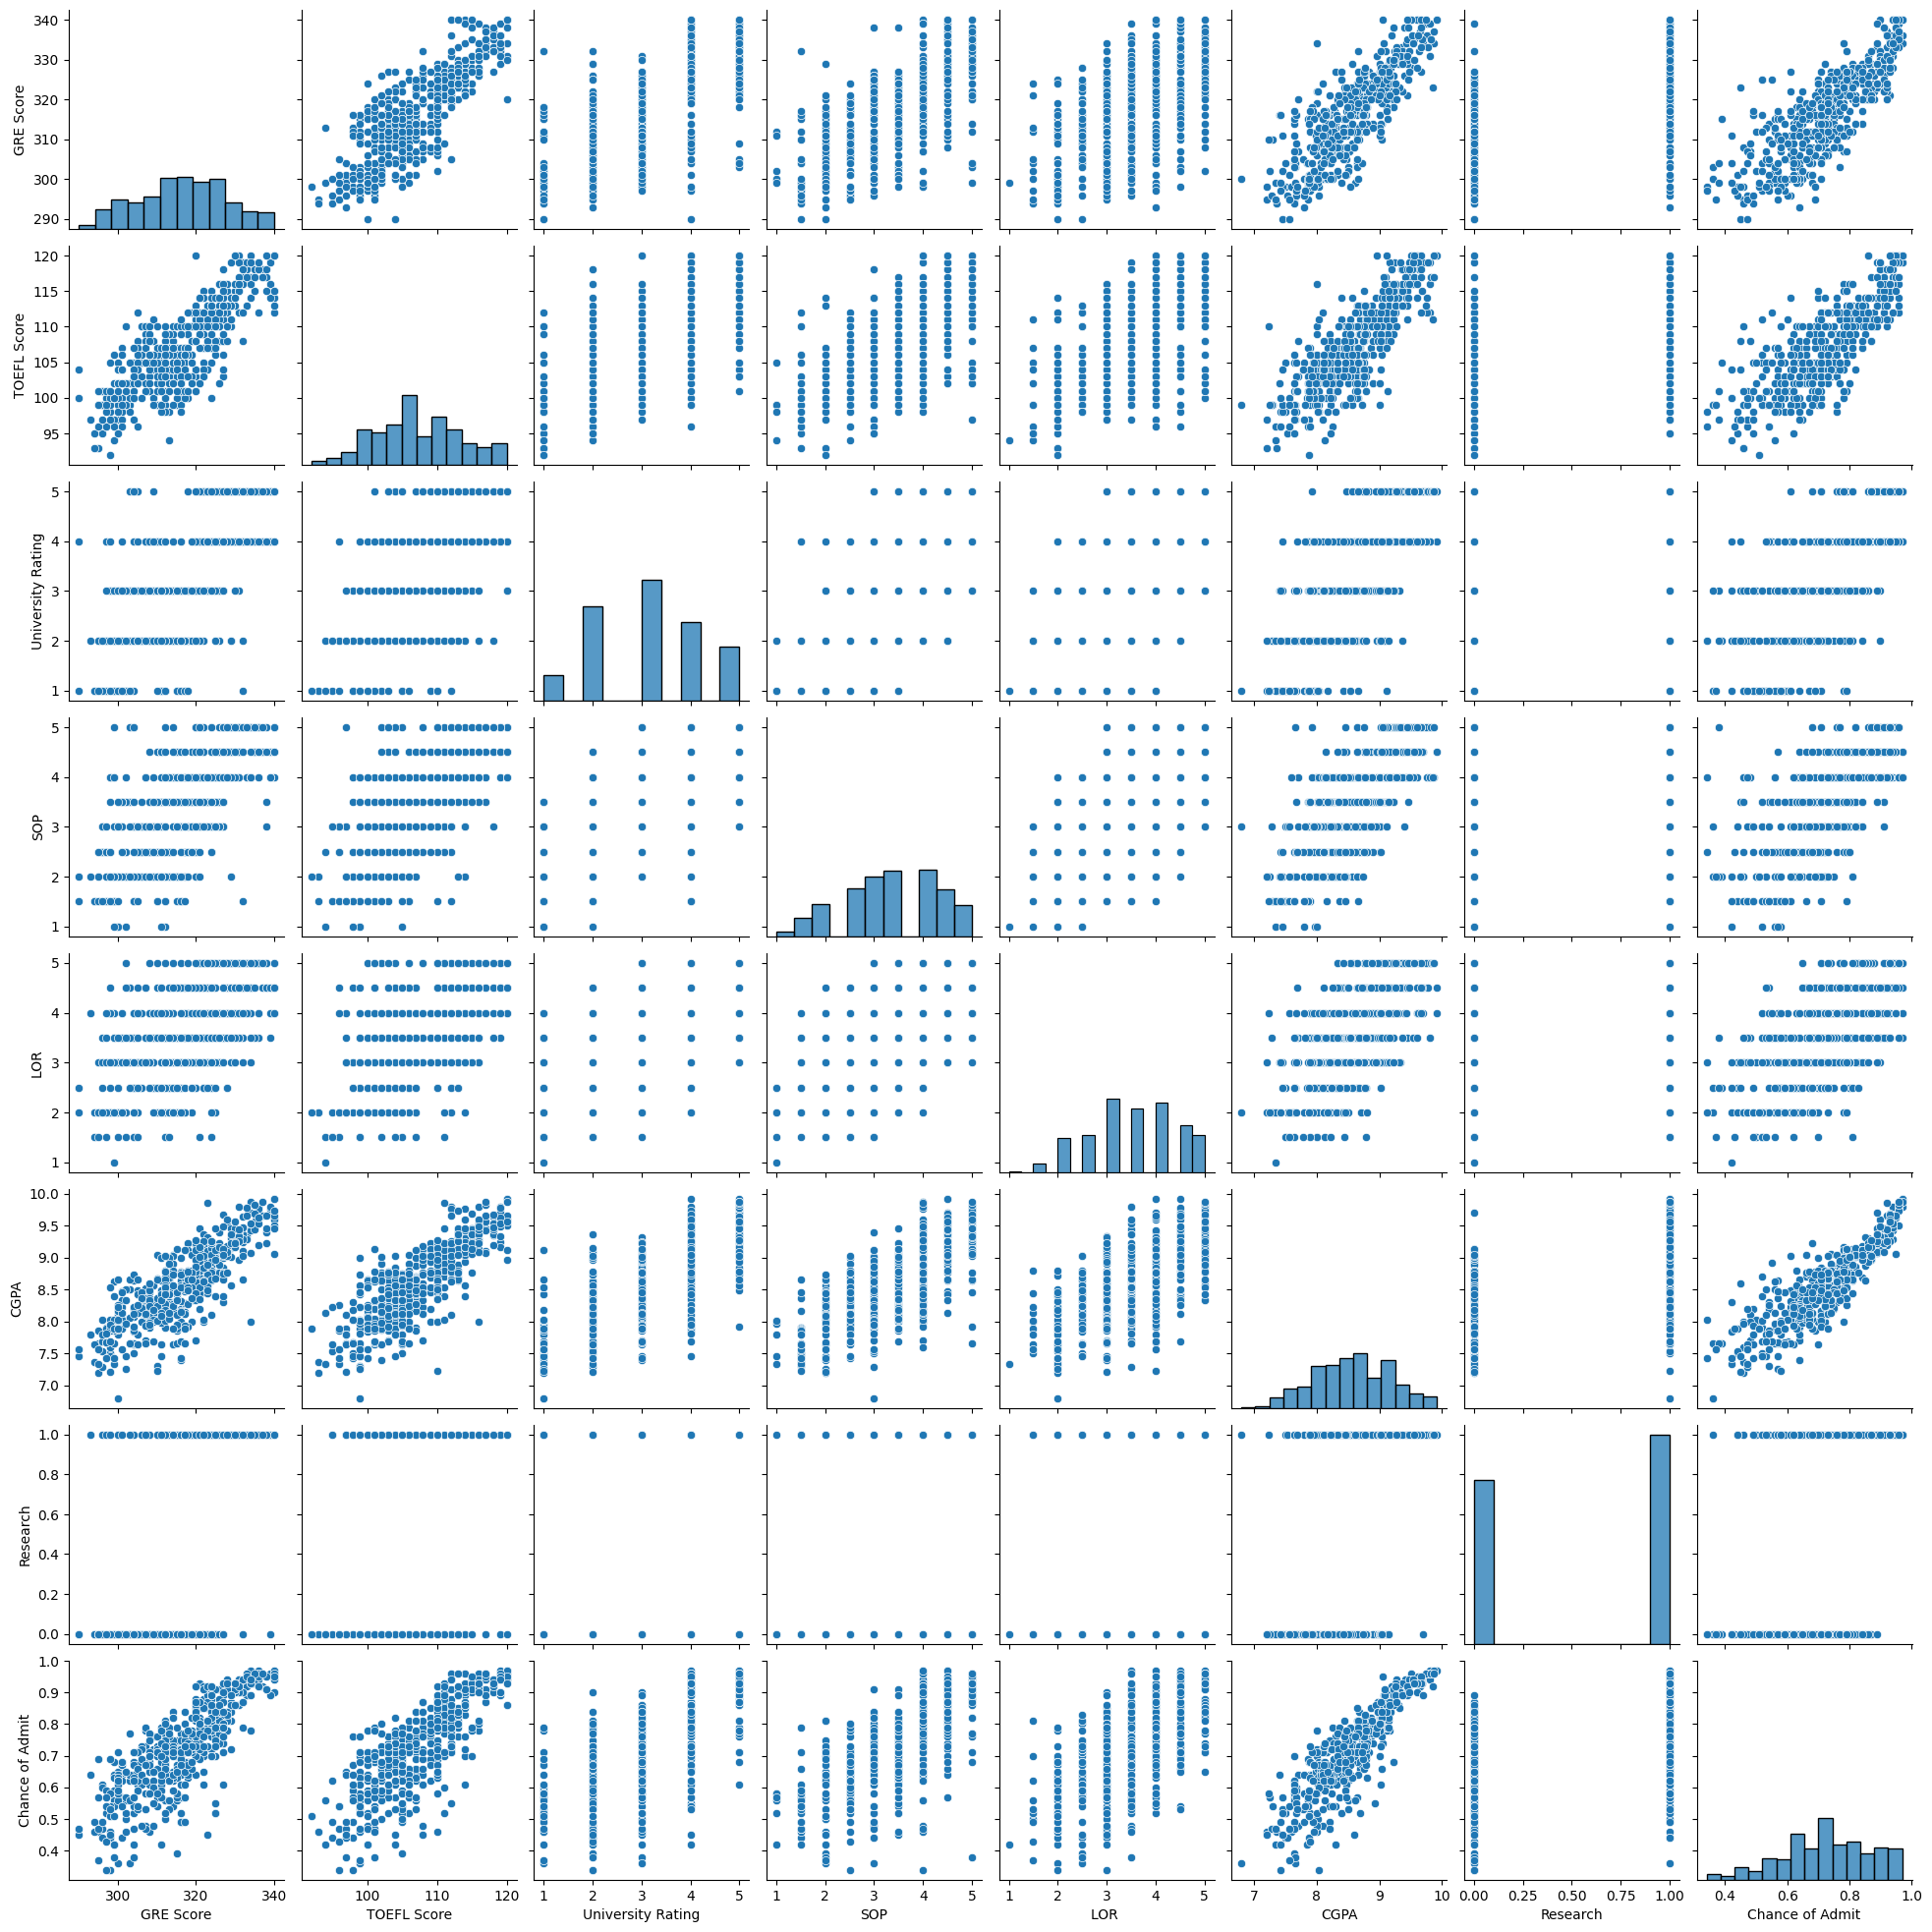

In [10]:
sns.pairplot(admission_df)

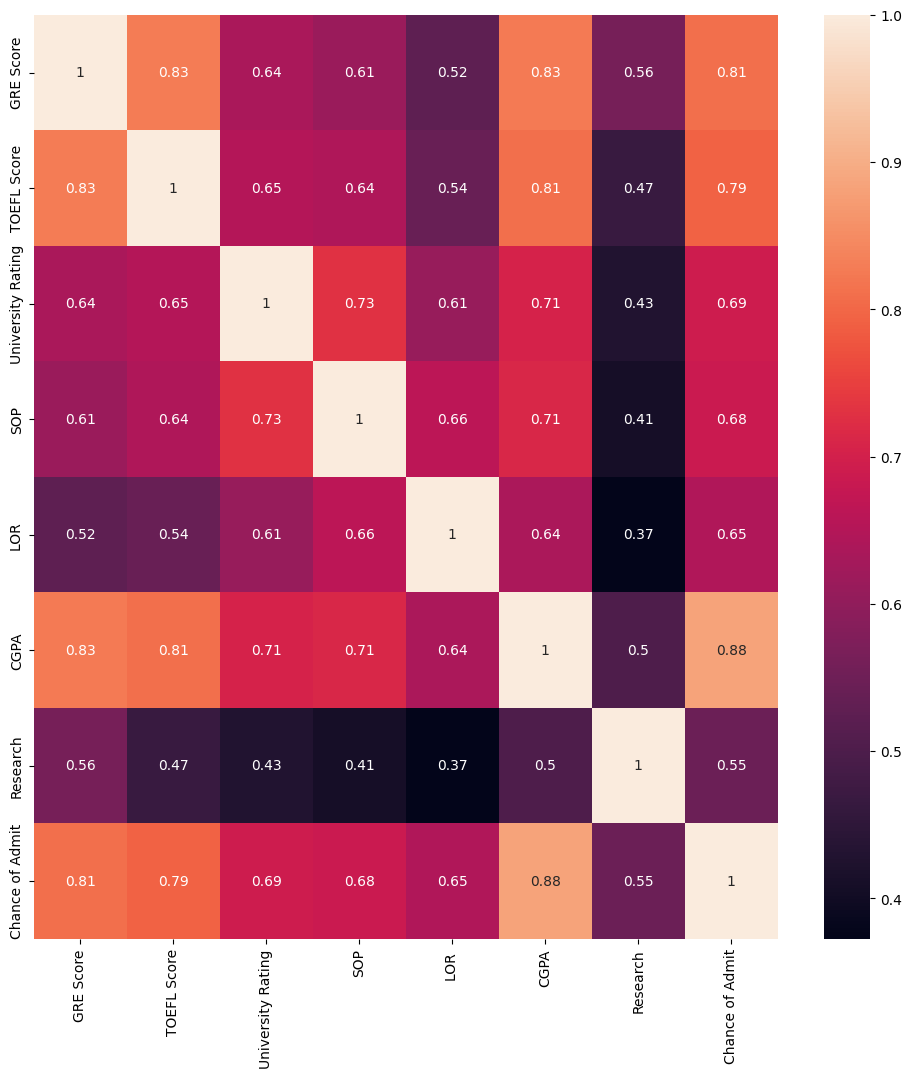

In [11]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [12]:
# create train and test datasets

admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [14]:
y = admission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [19]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
# scale the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [21]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [22]:
# split data into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [24]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8267050185147877

In [26]:
%pip install tensorflow --upgrade

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

2023-05-26 18:02:44.968246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
# ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [29]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [30]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.5443 - val_loss: 0.3130
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3636 - val_loss: 0.3415
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3405 - val_loss: 0.2566
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3085 - val_loss: 0.2700
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2846 - val_loss: 0.2835
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2852 - val_loss: 0.2590
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2529 - val_loss: 0.2511
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2363 - val_loss: 0.2440
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2330 - val_loss: 0.2485
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2408 - val_loss: 0.2585
Epoch 11/

In [31]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print(f"Accuracy : {accuracy_ANN}")

3/3 [==============================] - 0s 2ms/step - loss: 0.2155
Accuracy : 0.7844765186309814


In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

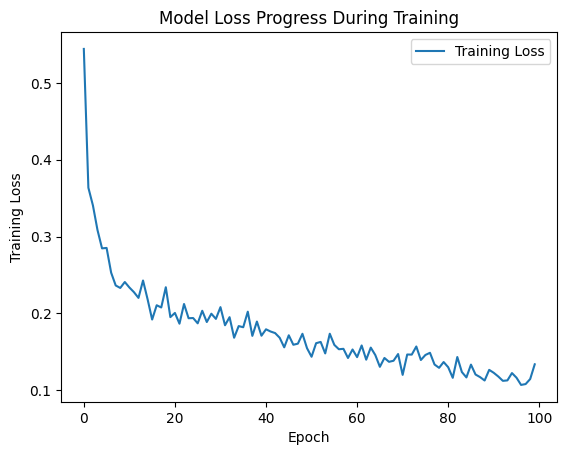

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [34]:
# train and evaluate decision tree and random forest models

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
accurcay_DecisionTree = DecisionTree_model.score(X_test, y_test)
accurcay_DecisionTree

0.6019000326748718

In [36]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)


/var/folders/ks/zn1fv9ns713b6r2cqctbkxp80000gn/T/ipykernel_91289/3098492534.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [37]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest 

0.7692349556531823

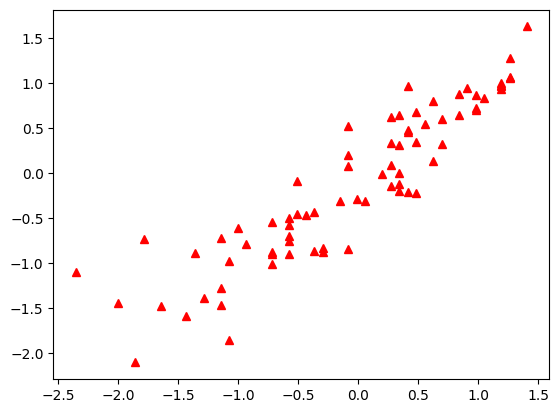

In [38]:
# calculate various KPIs

y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict,'^', color='red')

In [39]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

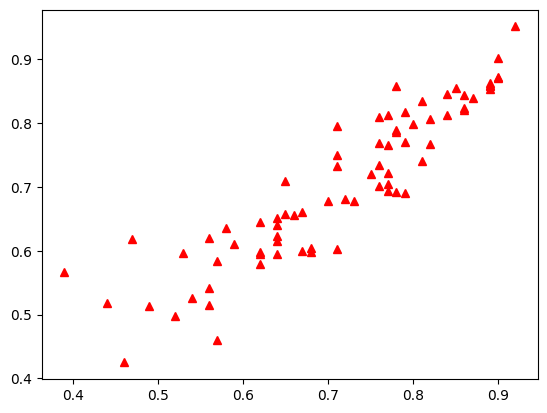

In [40]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')

In [41]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.053 
MSE = 0.002772023443037785 
MAE = 0.040697538828682815 
R2 = 0.8267050185147877 
Adjusted R2 = 0.8085995726879744
